# Seoul Bisiklet Veri Seti Keşifçi Veri Analizi Çalışmaları

Günümüzde, hareketlilik konforunu artırmak için birçok şehirde kiralık bisikletler hizmete sunulmuştur. Bekleme süresini azaltamak amacıyla kiralık bisikletlerin doğru zamanda halka açık ve erişilebilir hale getirilmesi önemlidir.Bu sebeple, şehre istikrarlı bir kiralık bisiklet tedariki sağlamak büyük bir endişe haline geliyor.En önemli kısım, istikrarlı kiralık bisiklet temini için her saat için gereken bisiklet sayısının tahminidir.

Veri seti hava durumu bilgilerini (Sıcaklık, Nem, Rüzgar Hızı, Görünürlük, Çiy Noktası, Güneş radyasyonu, Kar Yağış, Yağış), saat başına kiralanan bisiklet sayısı ve tarih bilgilerini içerir.

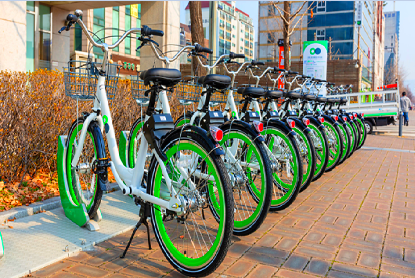

Veri seti özellikleri aşağıdaki gibidir.

- Date - yıl-ay-gün
- Rented Bike count - Saat başı kiralanan bisiklet sayısı
- Hour - Günün ilgili saati
- Temperature - Celsius türünden sıcaklık
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Gerekli kütüphanelerin yüklenmesi**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, \
                                  StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

C:\Users\guray\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\guray\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\guray\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


### Adım 1 : Veri Seti Özniteliklerine Hızlı Bakış

In [2]:
# Veri setinin yüklenmesi
df = pd.read_csv("SeoulBikeData.csv", encoding= 'unicode_escape')

In [3]:
# Veri setinin şekilsel özelliklerinin incelenmesi
print("Veri Seti Satır Sayısı :" ,df.shape[0])
print("Veri Seti Sütun Sayısı :" ,df.shape[1])
print("Veri Seti Hücre Sayısı : ", df.size)
print("Veri Seti Boyut Sayısı : ", df.ndim)

Veri Seti Satır Sayısı : 8760
Veri Seti Sütun Sayısı : 14
Veri Seti Hücre Sayısı :  122640
Veri Seti Boyut Sayısı :  2


In [4]:
# Veri setinin İlk 5 gözleminin incelenmesi
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Adım 2 : Veri Setindeki Özniteliklerin Veri Tiplerinin İncelenmesi 

Veri setinde **Object(4)**, **Integer(4)** ve **Float(6)** olmak üzere **3** farklı tipte öznitelik bulunurken, **Boolen** tipinde öznitelik bulunmamaktadır.

In [5]:
obj_cols = [col for col in df.columns if df[col].dtype == 'object']
bool_cols = [col for col in df.columns if df[col].dtype == 'bool']
int_cols = [col for col in df.columns if df[col].dtype == 'int64']
float_cols = [col for col in df.columns if df[col].dtype == 'float']

In [6]:
print("Object Tipindeki Öznitelik Sayısı : ", len(obj_cols))
print(obj_cols)
print("*"*50)
print("Boolen Tipindeki Öznitelik Sayısı : ", len(bool_cols))
print("*"*50)
print("Integer Tipindeki Öznitelik Sayısı : ", len(int_cols))
print(int_cols)
print("*"*50)
print("Float Tipindeki Öznitelik Sayısı : ", len(float_cols))
print(float_cols)


Object Tipindeki Öznitelik Sayısı :  4
['Date', 'Seasons', 'Holiday', 'Functioning Day']
**************************************************
Boolen Tipindeki Öznitelik Sayısı :  0
**************************************************
Integer Tipindeki Öznitelik Sayısı :  4
['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)']
**************************************************
Float Tipindeki Öznitelik Sayısı :  6
['Temperature(°C)', 'Wind speed (m/s)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Adım 3 : Eksik Verilerin ve Tekrarlanan Verilerin Kontrolü

Veri setinde herhangi bir tekrar eden ya da eksik veri bulunmamaktadır.

#### 3.1 Tekrar Eden Kayıtların İncelenmesi

In [8]:
duplicated = df[df.duplicated()]

print('Before dropping duplicates:', df.shape[0])
print('Number of duplicate rows:', len(duplicated))

# Check if duplicates have any missing values
dup_nan = duplicated.isnull().sum().sum() == 0
if dup_nan:
    print('No missing values in duplicated rows')
else:
    print('Missing values in duplicated rows')

# Drop duplicates
df.drop_duplicates(inplace=True)
print('After dropping duplicates:', df.shape[0])

Before dropping duplicates: 8760
Number of duplicate rows: 0
No missing values in duplicated rows
After dropping duplicates: 8760


#### 3.2 Eksik Verilerin İncelenmesi

In [9]:
print("Eksik Veri Sayısı : ", df.isna().sum().sum())

Eksik Veri Sayısı :  0


In [10]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

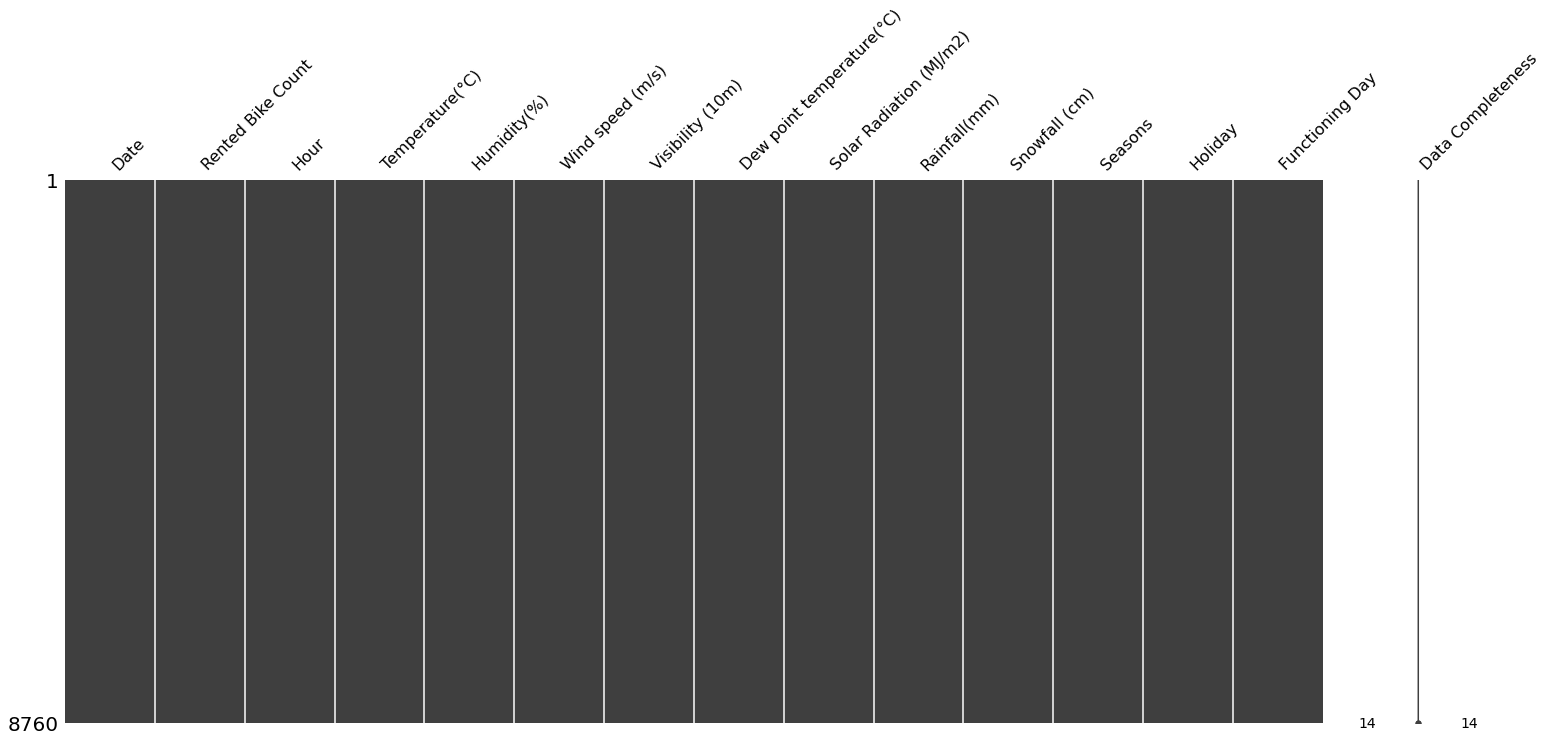

In [11]:
msno.matrix(df, labels=True);

### Adım 4 : Veri Setindeki Özniteliklerin Korelasyonları

- Veri Setinde **Temperature ile Dew Point Temperature** Arasında **%91**'lik yüksek bir ilişki bulunmaktadır.
- Veri Setinde **Humidity ile Dew Point Temperature** Arasında **%54**'lik yüksek bir ilişki bulunmaktadır.

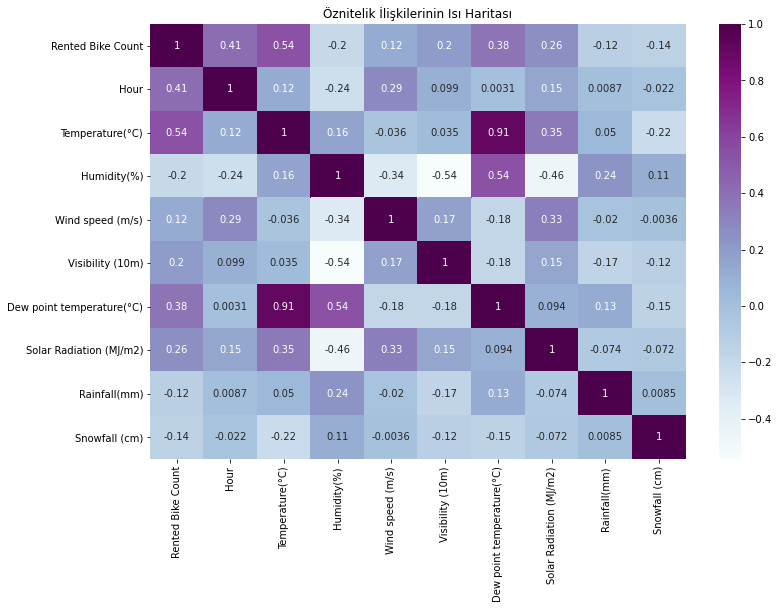

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap="BuPu")
plt.title("Öznitelik İlişkilerinin Isı Haritası");

### Adım 5 : Veri Setindeki Özniteliklerin İncelenmesi

#### 5.1 Date & Hour

Veri setinde bulunan date özniteliği object tipinden **datetime** tipine çevrilmiştir.

In [13]:
print("Date Özniteliğinin Tipi :",df["Date"].dtype)
df["Date"] = pd.to_datetime(df["Date"])
print("Date Özniteliğinin Yeni Tipi :",df["Date"].dtype)

Date Özniteliğinin Tipi : object
Date Özniteliğinin Yeni Tipi : datetime64[ns]


In [14]:
df["Date"].nunique()

365

In [15]:
df["Date"]

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [16]:
print("Veri Seti Başlangıç Tarihi : ", df["Date"].min())
print("Veri Seti Bitiş Tarihi : ", df["Date"].max())
print("Veri Setinin bitiş ve başlangıç tarihleri arasında toplamda {} fark bulunmaktadır ". \
      format(df["Date"].max() - df["Date"].min()))

Veri Seti Başlangıç Tarihi :  2017-01-12 00:00:00
Veri Seti Bitiş Tarihi :  2018-12-11 00:00:00
Veri Setinin bitiş ve başlangıç tarihleri arasında toplamda 698 days 00:00:00 fark bulunmaktadır 


Veri seti `Date` öznitelinden ay yıl ve günler yeni birer öznitelik haline getirilmiştir.

In [17]:
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [18]:
df[["Date","Day","Year","Month","Hour"]].sample(10)

,Date,Day,Year,Month,Hour
7895,2018-10-25,25,2018,10,23
3211,2018-04-13,13,2018,4,19
2652,2018-03-21,21,2018,3,12
8664,2018-11-27,27,2018,11,0
4140,2018-05-22,22,2018,5,12
3152,2018-11-04,4,2018,11,8
1351,2018-01-26,26,2018,1,7
8070,2018-02-11,11,2018,2,6
8650,2018-11-26,26,2018,11,10
6894,2018-09-14,14,2018,9,6


#### 5.2 Rented Bike Count 

Her bir saatte kiralanan bisiklet sayısını içeren hedef değişkendir.

In [19]:
df["Rented Bike Count"]

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [20]:
df["Rented Bike Count"].unique()

array([ 254,  204,  173, ..., 1538,  804,  595], dtype=int64)

In [21]:
df["Rented Bike Count"].nunique()

2166

In [22]:
df["Rented Bike Count"].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

#### Hedef Değişken Çarpık Dağılımdadır

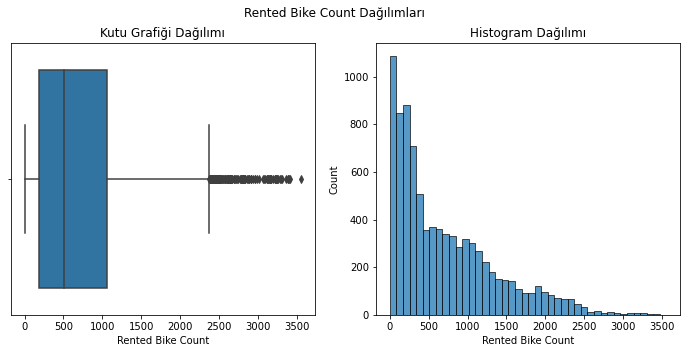

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Rented Bike Count Dağılımları')
sns.boxplot(ax=axes[0], x=df["Rented Bike Count"])
axes[0].set_title("Kutu Grafiği Dağılımı")
sns.histplot(ax=axes[1], x=df["Rented Bike Count"]);
axes[1].set_title("Histogram Dağılımı");

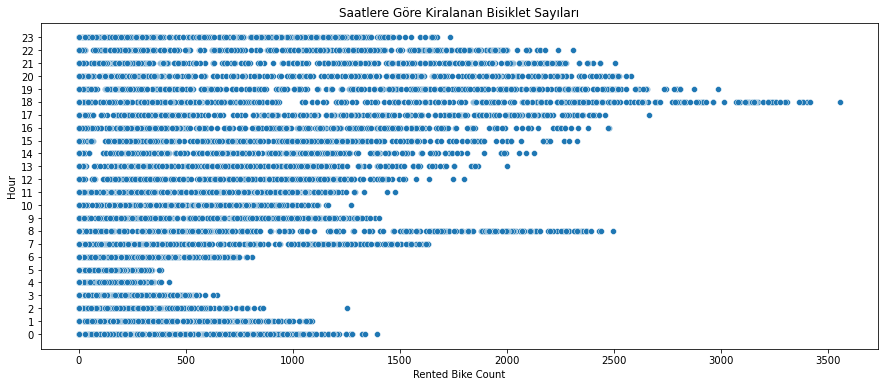

In [24]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x="Rented Bike Count", y="Hour")
plt.yticks(range(0,24))
plt.title("Saatlere Göre Kiralanan Bisiklet Sayıları");

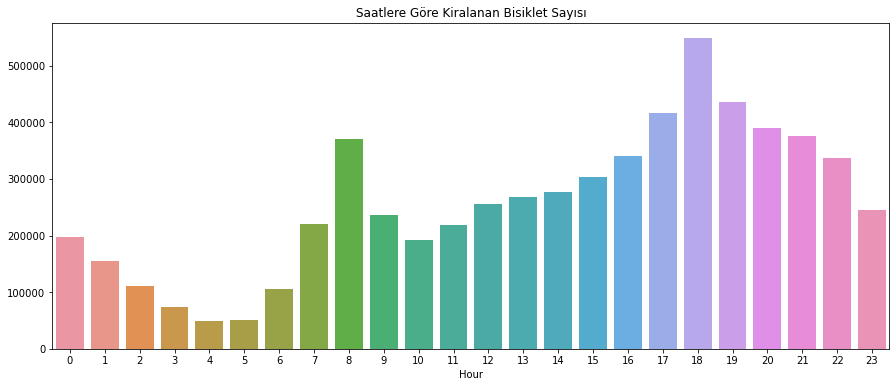

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(x =df.groupby("Hour").sum()["Rented Bike Count"].index,y=df.groupby("Hour").sum()["Rented Bike Count"].values)
plt.title("Saatlere Göre Kiralanan Bisiklet Sayısı");

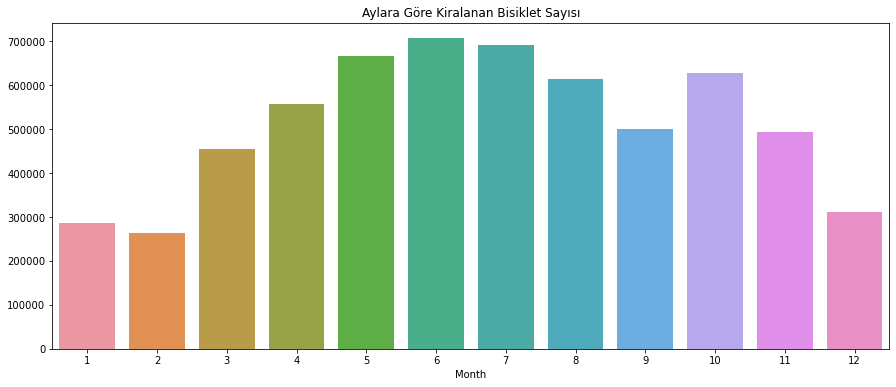

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(x =df.groupby("Month").sum()["Rented Bike Count"].index,y=df.groupby("Month").sum()["Rented Bike Count"].values)
plt.title("Aylara Göre Kiralanan Bisiklet Sayısı");

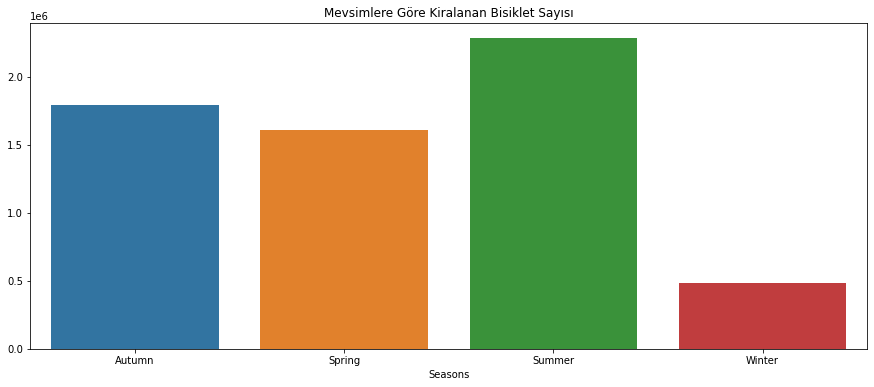

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(x =df.groupby("Seasons").sum()["Rented Bike Count"].index,y=df.groupby("Seasons").sum()["Rented Bike Count"].values)
plt.title("Mevsimlere Göre Kiralanan Bisiklet Sayısı");

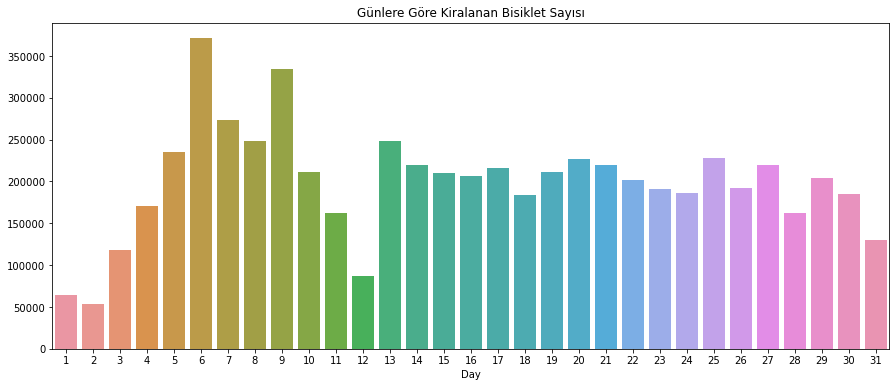

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.groupby("Day").sum()["Rented Bike Count"].index,y=df.groupby("Day").sum()["Rented Bike Count"].values)
plt.title("Günlere Göre Kiralanan Bisiklet Sayısı");

#### 5.3 Temperature

In [29]:
feauture = 'Temperature(°C)'

In [30]:
df[feauture].describe().T

count    8760.000000
mean       12.882922
std        11.944825
min       -17.800000
25%         3.500000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature(°C), dtype: float64

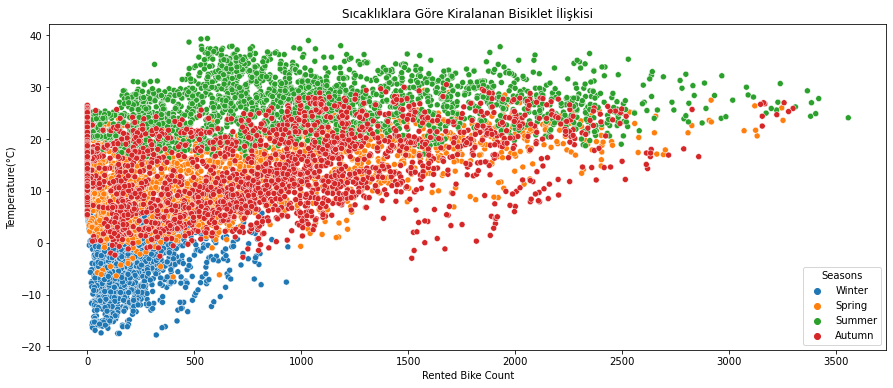

In [31]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x="Rented Bike Count", y=feauture,hue="Seasons")
plt.title("Sıcaklıklara Göre Kiralanan Bisiklet İlişkisi");

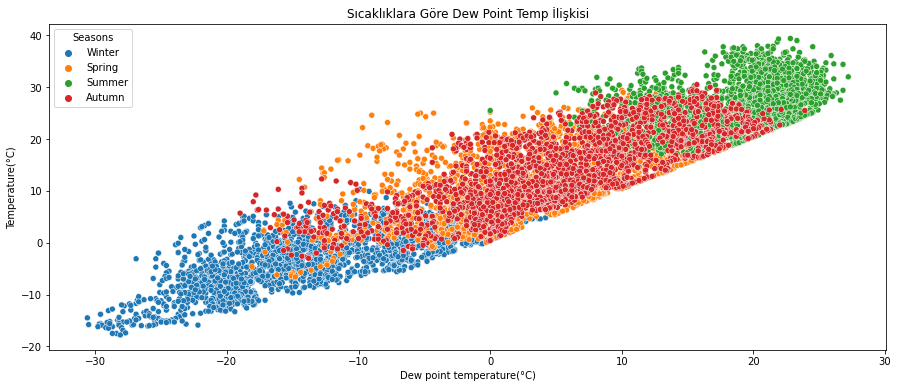

In [32]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x="Dew point temperature(°C)", y=feauture,hue="Seasons")
plt.title("Sıcaklıklara Göre Dew Point Temp İlişkisi");

#### 5.4 Humidity

In [33]:
feature = "Humidity(%)"

In [34]:
df["Humidity(%)"].describe()

count    8760.000000
mean       58.226256
std        20.362413
min         0.000000
25%        42.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humidity(%), dtype: float64

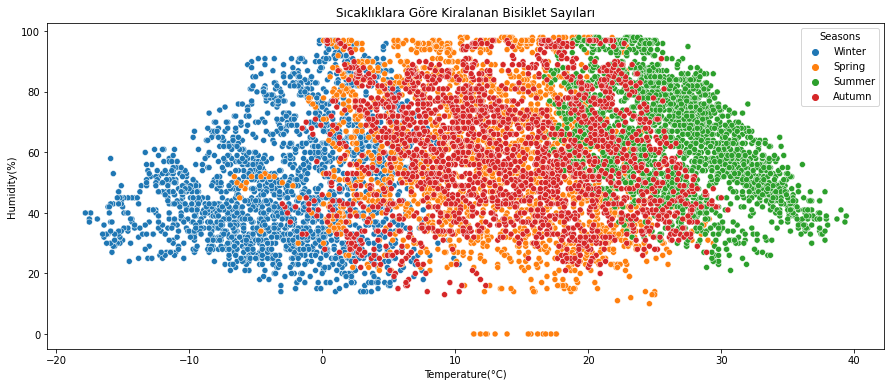

In [35]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x="Temperature(°C)", y=feature,hue="Seasons")
plt.title("Sıcaklıklara Göre Kiralanan Bisiklet Sayıları");

#### 5.5 Diğer  Değişkenlerin Dağılımı

In [36]:
numerical_cols = df.describe().columns.tolist()
categorical_cols = [col for col in df.columns if col not in numerical_cols]
numerical_cols.remove("Hour")
categorical_cols.append("Hour")
categorical_cols.remove("Date")
print('Numerical columns:', numerical_cols, 'count:', len(numerical_cols))
print('Categorical columns:', categorical_cols, 'count:', len(categorical_cols))
print('All columns count:', len(df.columns))

Numerical columns: ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day', 'Month', 'Year'] count: 12
Categorical columns: ['Seasons', 'Holiday', 'Functioning Day', 'Hour'] count: 4
All columns count: 17


#### Nümerik Değişkenler

Number of continuous columns: 12


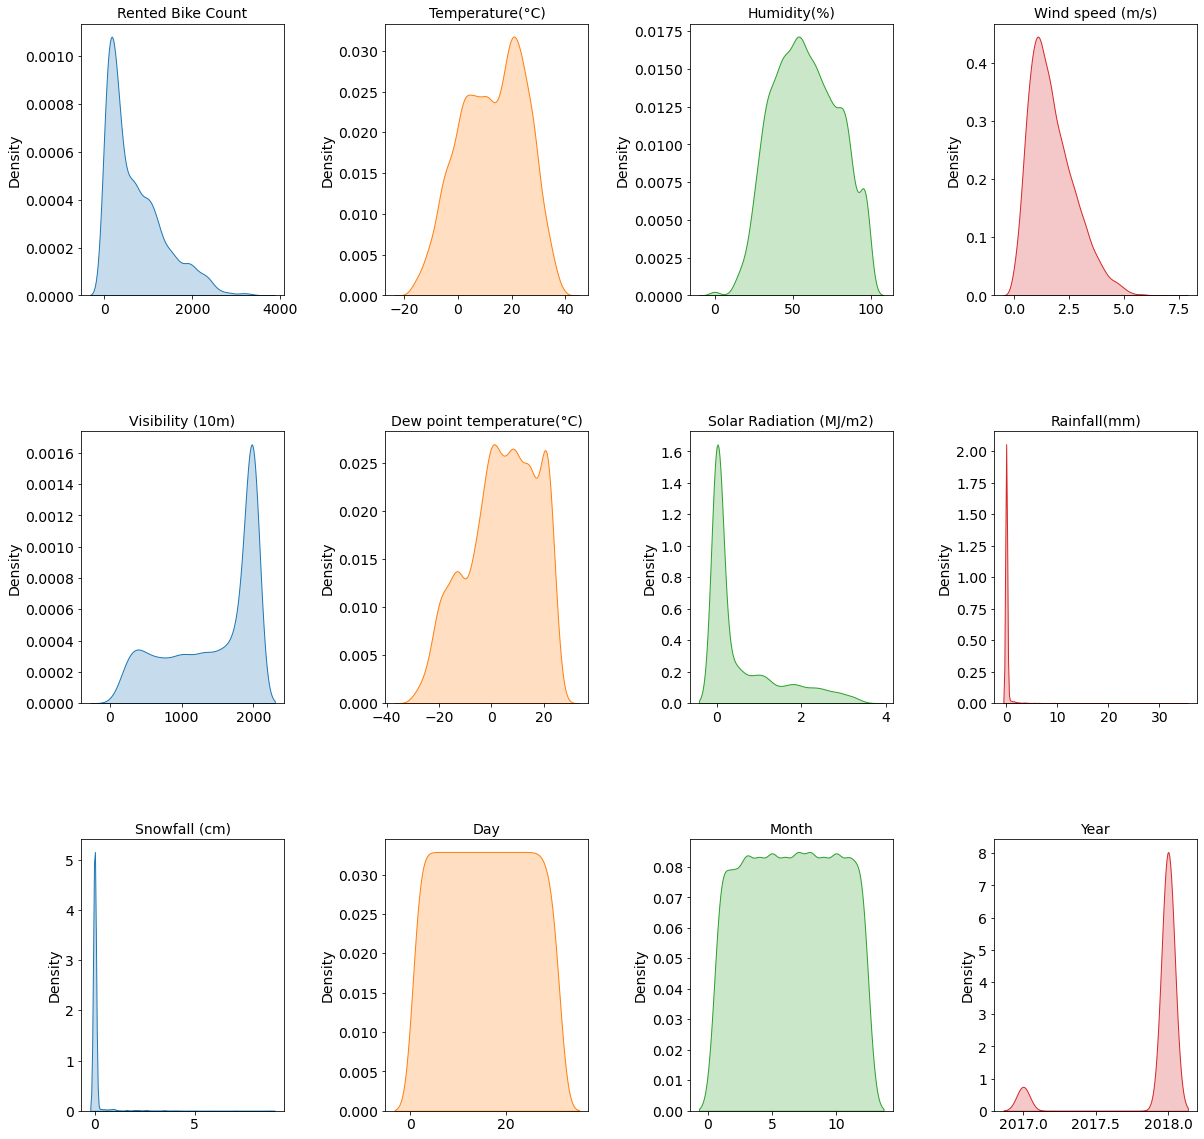

In [37]:
print('Number of continuous columns:', len(numerical_cols))
# Plot Kde plot for continuous columns using subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20),
                         gridspec_kw={'hspace': 0.5, 'wspace': 0.5})

for i, col in enumerate(numerical_cols):
    sns.kdeplot(df[col], ax=axes[i // 4, i % 4],
                shade=True, label=col,
                color=sns.color_palette()[i % 4])
    axes[i // 4, i % 4].set_title(col, fontsize=14)
    axes[i // 4, i % 4].set_xlabel('')
    axes[i // 4, i % 4].set_ylabel('Density', fontsize=14)

    # make Ticks bigger for better readability
    axes[i // 4, i % 4].tick_params(labelsize=14)

#### Kategorik Değişkenler

Categorical variables: Seasons, Holiday, Functioning Day, Hour


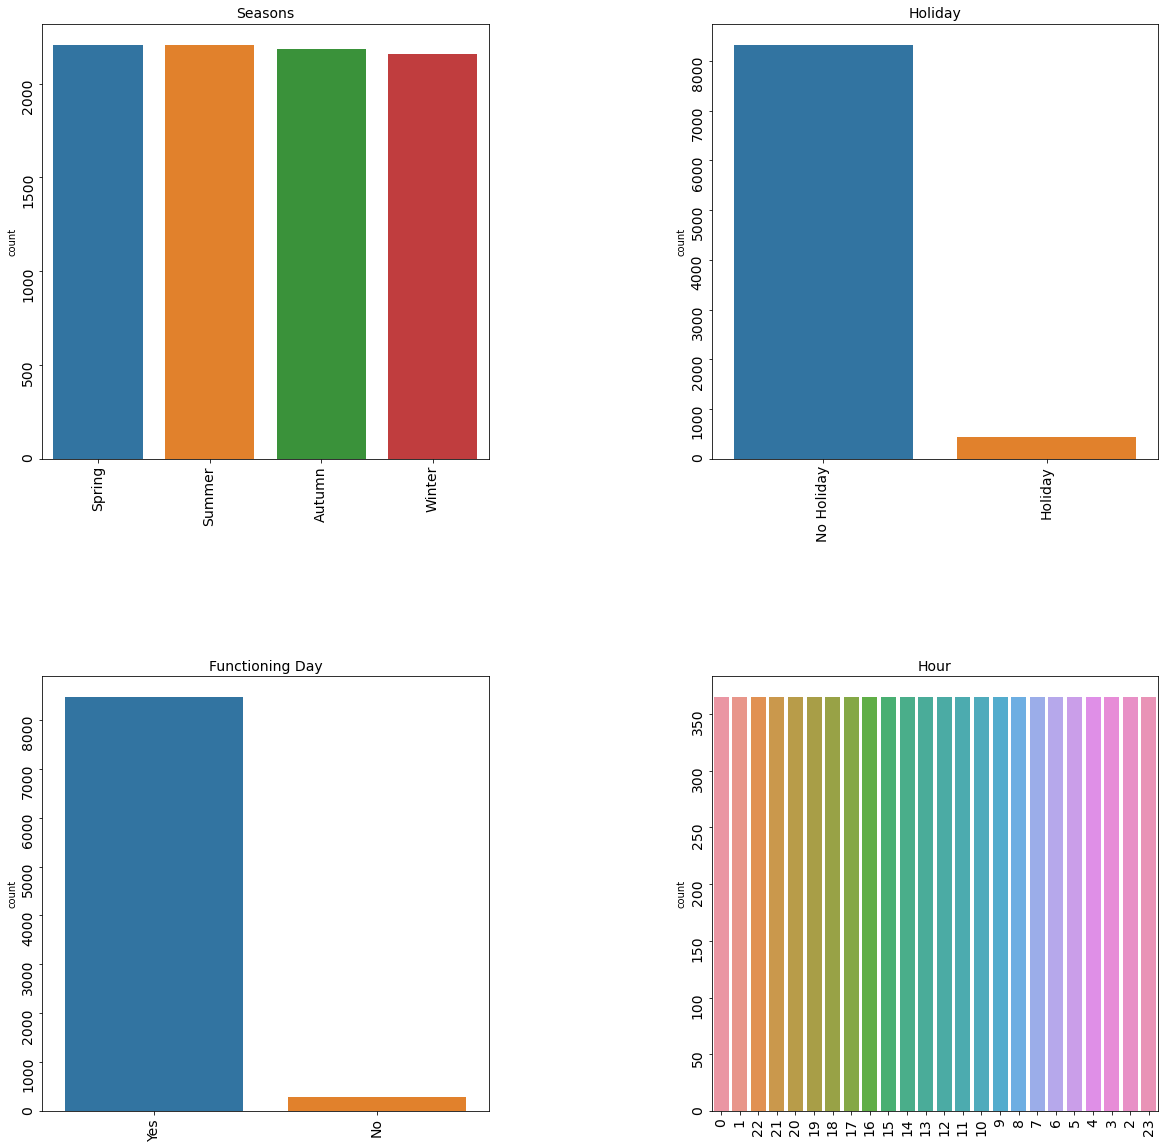

In [38]:
print('Categorical variables:', ', '.join(categorical_cols))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20),
                         gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i // 2, i % 2],
                  order=df[col].value_counts().index)
    axes[i // 2, i % 2].set_title(col, fontsize=14)
    axes[i // 2, i % 2].set_xlabel('')

    axes[i // 2, i % 2].tick_params(labelsize=14, labelrotation=90)

### Adım 6 : Veri Setinin Modele Uygun Hale Getirilmesi

#### 6.1 Veri Setinde Yüksek Korelasyona Sahip Özniteliklerin Silinmesi

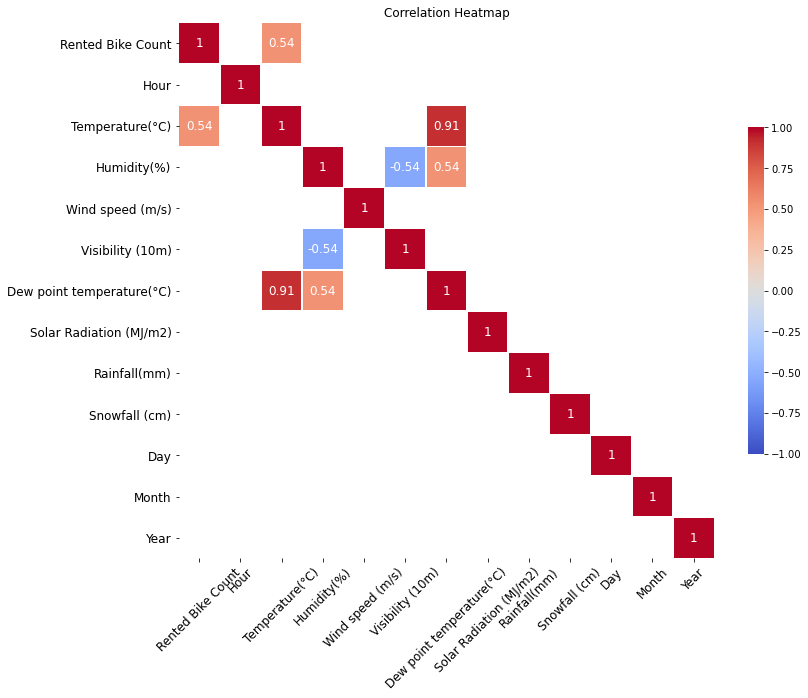

In [39]:
corr = df.corr()
corr_filter = np.abs(corr) > 0.5
corr = corr.where(corr_filter)
mask = np.zeros_like(corr, dtype=np.bool_)

plt.figure(figsize=(12, 12))
sns.heatmap(corr,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0,
            annot=True,
            annot_kws={'size': 12},
            square=True,
            linewidths=0.5,
            mask=mask,
            cbar_kws={'shrink': 0.5})
plt.title('Correlation Heatmap', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12);

**Temperature** ile **Dew Point** Tempareture arasında bulunan **%91** yüksek korelasyon aslında iki değişkenin neredeyse aynı bilgiyi taşığını ifade etmektedir. Bu sebeple hesaplamayı kolaylaştırmak adına ikisinden birinin silinmesi mantıklı olacaktır.

In [40]:
df.drop("Temperature(°C)", axis=1, inplace=True)

In [41]:
df.drop(columns = ["Day","Year","Date","Month"],inplace=True)

#### 6.2 Hedef Değişkendeki Gizli Eksik Veriler

Toplamda 295 satır veride kiralanan 0 adet bisiklet vardır. 0 adet bisiklet kiralanması durumdan verisinin girilmiş olması anlamsız gözükmektedir. Bu sebeple bu indexler veri setinden atılmıştır.

In [42]:
df[df["Rented Bike Count"] == 0]

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,0,0,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,0,1,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,0,2,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,0,3,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,0,4,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...
8251,0,19,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,0,20,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,0,21,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,0,22,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


In [43]:
df.drop(df[df["Rented Bike Count"] == 0].index, axis=0,inplace=True)

#### 6.3 Aykırı Değerlerin  İncelenmesi

IOR yöntemi kullanılarak 
- Birinci çeyreklikteden Inquartile Range'in 1.5 katı çıkırılarak alt sınır
- Üçüncü çeyrekliğe Inquartile Range'in 1.5 katı eklenerek üst sınır

bulunmaktadır.

In [44]:
def outlier_detect(feature,data):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR
    return alt_sinir, ust_sinir

Anomali tespitinin uygulanması için Sürekli Değerler seçilmiştir. Kesikli değerlere yapılan anomali analizinden 2 değerden biri anomali olarak işaretlenmektedir. Bu sebeple sürekli değerler üzerinde çalışılmıştır.

In [45]:
liste = ['Rented Bike Count','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)',
      'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
dict_outlier_bounds = dict()

for i in liste:
    
    dict_outlier_bounds.setdefault(i,outlier_detect(i,df))
    
dict_outlier_bounds

{'Rented Bike Count': (-1091.0, 2389.0),
 'Humidity(%)': (-6.0, 122.0),
 'Wind speed (m/s)': (-1.1999999999999997, 4.3999999999999995),
 'Visibility (10m)': (-662.5, 3597.5),
 'Dew point temperature(°C)': (-35.55, 45.64999999999999),
 'Solar Radiation (MJ/m2)': (-1.395, 2.325),
 'Rainfall(mm)': (0.0, 0.0),
 'Snowfall (cm)': (0.0, 0.0)}

Anomali içeren özniteliklerin kutu grafiği

<Figure size 576x432 with 0 Axes>

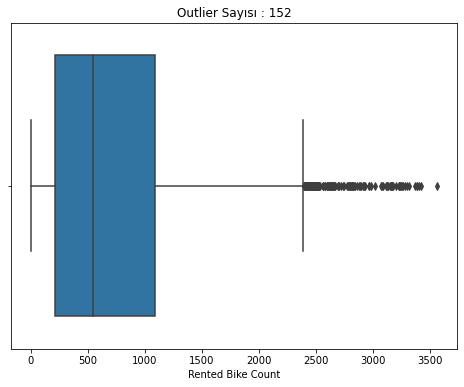

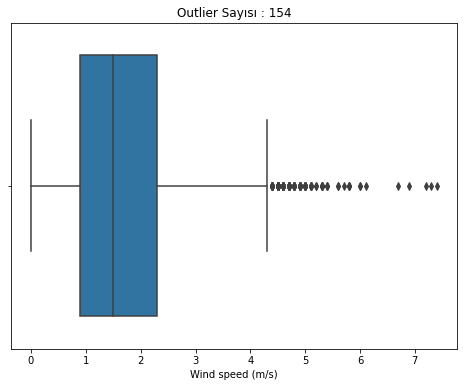

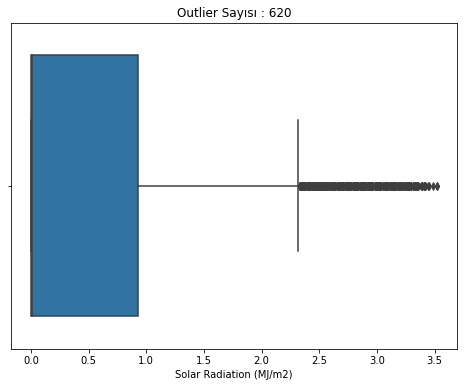

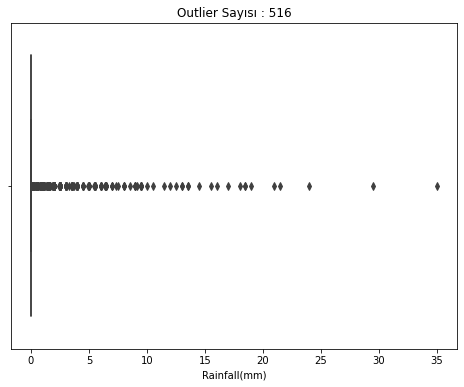

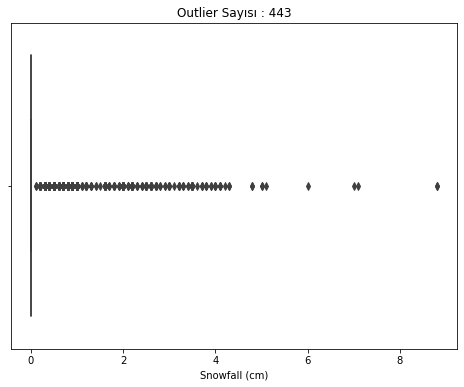

In [46]:
plt.figure(figsize=(8,6))
outlier_cols = []
for i in liste:
    outlier_len = len(df[(df[i] < dict_outlier_bounds[i][0]) | (df[i] > dict_outlier_bounds[i][1])])
    if outlier_len > 0 :
        outlier_cols.append(i)
        plt.figure(figsize=(8,6))
        sns.boxplot(x=df[i])
        plt.title("Outlier Sayısı : " + str(outlier_len))
        plt.show()

 Anomali Değerlerin **Baskılama Yöntemi** ile Doldurulması

Veri seti hedef değişken dağılımı **sağa yatık bir dağılım olduğundan dolayı ortalama ile doldurmak veriyi yanıltabilir**.
Aynı zamanda **tüm outlier değerler üst sınırı aştığından dolayı bunları median ile doldurmak yerine baskılayarak** tamamını **üst sınır değeri** ile değiştirmek daha mantıklı olacaktır.

In [47]:
for i in outlier_cols:
    df.loc[df[(df[i]> dict_outlier_bounds[i][1])].index, i] = dict_outlier_bounds[i][1]

Sürekli Değerleri inceledikten sonra veri setinde bulunan kategorik değişkenlerin eşsiz değerlerine bakarak anomali bir durum olup olmadığını incelemek mantıklı olacaktır.

In [48]:
categorical_cols = ["Seasons","Holiday","Functioning Day"]

In [49]:
for i in categorical_cols:
    print(i)
    print("-"*20)
    print(df[i].value_counts())
    print("*"*30)

Seasons
--------------------
Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64
******************************
Holiday
--------------------
No Holiday    8057
Holiday        408
Name: Holiday, dtype: int64
******************************
Functioning Day
--------------------
Yes    8465
Name: Functioning Day, dtype: int64
******************************


**Functioning Day** tek bir değer içerdiği için veri setinde ayırt edici bir özellik olma durumnda değildir. Bu sebeple veri setinden çıkarılmaktadır.

In [50]:
df.drop("Functioning Day",axis=1,inplace=True)

#### 6.4 Değişkenlerin Encode Edilmesi

#### Label Encoding

In [51]:
label_encoder = LabelEncoder()

In [52]:
df['Holiday'] = label_encoder.fit_transform(df['Holiday'])

#### One Hot Encoding

In [53]:
df_seasons = pd.get_dummies(df['Seasons'], prefix = 'Seasons')

In [54]:
df_seasons.head(1)

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,0,0,1


One Hot Encode edilmiş veriler ile mevcut veri seti birleştirilmektedir.

In [55]:
df = pd.concat([df, df_seasons], axis=1)

Veri setindeki dummy değişkenler kaldırılmaktadır.

In [56]:
df.drop(["Seasons", "Seasons_Autumn"], axis = 1, inplace = True)

#### 6.5 Input ve Target Setlerinin Ayrılması

In [57]:
df_target = df[["Rented Bike Count"]]
df_input = df.drop(columns="Rented Bike Count")

#### 6.6 Veri Setinin Train ve Test Setlerine Ayrılması

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_input,
                                                    df_target,
                                                    test_size=0.25,
                                                    random_state=42)

In [59]:
print("Veri setlerinin Boyutları")
print("X_test --- > ", X_test.shape)
print("y_test --- > ", y_test.shape)
print("X_train --- > ", X_train.shape)
print("y_train --- > ", y_train.shape)

Veri setlerinin Boyutları
X_test --- >  (2117, 12)
y_test --- >  (2117, 1)
X_train --- >  (6348, 12)
y_train --- >  (6348, 1)


In [60]:
X_train.head(2)

,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Spring,Seasons_Summer,Seasons_Winter
1164,12,72,2.4,256,-2.0,0.0,0.0,0.0,1,0,0,1
4803,3,69,1.4,1179,14.0,0.0,0.0,0.0,1,0,1,0


In [61]:
y_train.head(2)

,Rented Bike Count
1164,267
4803,369


In [62]:
X_test.head(2)

,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Spring,Seasons_Summer,Seasons_Winter
5993,17,44,2.4,1860,21.4,1.69,0.0,0.0,1,0,1,0
5340,12,73,2.1,1326,22.7,0.87,0.0,0.0,1,0,1,0


In [63]:
y_test.head(2)

,Rented Bike Count
5993,1232
5340,964


### Adım 6 : Modellerin Çalıştırılması

In [64]:
def compML(X_train, X_test, y_train, y_test, alg):
    #Modelling
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = mean_squared_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test,y_pred)
    R2 = r2_score(y_test, y_pred)
    model_name = alg.__name__
    print(model_name, "Mean Absolute Error:", MAE)
    print(model_name, "Mean Squared Error:", RMSE)
    print(model_name, "Mean Absolute Percentage Error:",MAPE)
    print(model_name, "R2 Score:",R2)
    print("*"*60)

In [65]:
models = [LGBMRegressor, 
          XGBRegressor, 
          GradientBoostingRegressor, 
          RandomForestRegressor, 
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor, 
          SVR]

In [66]:
for i in models:
    compML(X_train, X_test, y_train, y_test, i)

LGBMRegressor Mean Absolute Error: 142.86708603022836
LGBMRegressor Mean Squared Error: 50818.185882586724
LGBMRegressor Mean Absolute Percentage Error: 0.5224559578865668
LGBMRegressor R2 Score: 0.865304233990843
************************************************************
XGBRegressor Mean Absolute Error: 147.5087869752394
XGBRegressor Mean Squared Error: 51847.4366792408
XGBRegressor Mean Absolute Percentage Error: 0.5281617439503787
XGBRegressor R2 Score: 0.8625761609189083
************************************************************
GradientBoostingRegressor Mean Absolute Error: 177.6744832934882
GradientBoostingRegressor Mean Squared Error: 65713.33855661392
GradientBoostingRegressor Mean Absolute Percentage Error: 0.7219974181660194
GradientBoostingRegressor R2 Score: 0.8258239974494022
************************************************************
RandomForestRegressor Mean Absolute Error: 146.53692017005196
RandomForestRegressor Mean Squared Error: 53783.772850070854
RandomFores

### Adım 7 : Best Model  LGBMRegressor

#### Basic Model

In [67]:
model_LGBM = RandomForestRegressor ().fit(X_train, y_train)
y_pred = model_LGBM.predict(X_test)

In [68]:
preds_df = pd.concat([y_test["Rented Bike Count"].reset_index(drop=True),pd.Series(y_pred)],axis=1)
preds_df.columns =["y_actual","y_pred"]

In [69]:
preds_df

,y_actual,y_pred
0,1232,1303.23
1,964,831.85
2,942,1174.19
3,373,324.80
4,1259,1948.08
...,...,...
2112,144,267.22
2113,718,1115.69
2114,1614,1474.77
2115,585,815.74


#### Tuned Model

In [70]:
lgb_model = LGBMRegressor()
lgb_model

LGBMRegressor()

In [71]:
lgbm_params = {"learning_rate": [0.01, 0.1, 0.5, 1],
              "n_estimators": [20,40,100,200,500,1000],
              "max_depth": [1,2,3,4,5,6,7,8,9,10]}

In [72]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [73]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}

In [74]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                          max_depth = 9, 
                          n_estimators = 200).fit(X_train, y_train)

In [75]:
y_pred_tuned = lgbm_tuned.predict(X_test)

In [76]:
MAE = mean_absolute_error(y_test, y_pred_tuned)
RMSE = mean_squared_error(y_test, y_pred_tuned)
MAPE = mean_absolute_percentage_error(y_test, y_pred_tuned)
R2 = r2_score(y_test, y_pred_tuned)

In [77]:
print( "Mean Absolute Error:", MAE)
print("Mean Squared Error:", RMSE)
print("Mean Absolute Percentage Error:",MAPE)
print("R2 Score:",R2)

Mean Absolute Error: 141.7281285269811
Mean Squared Error: 50653.07386962284
Mean Absolute Percentage Error: 0.4907175458363668
R2 Score: 0.8657418704132621


In [78]:
preds_df_tuned = pd.concat([y_test["Rented Bike Count"].reset_index(drop=True),pd.Series(y_pred_tuned)],axis=1)
preds_df_tuned.columns =["y_actual","y_pred_tuned"]

In [79]:
preds_df

,y_actual,y_pred
0,1232,1303.23
1,964,831.85
2,942,1174.19
3,373,324.80
4,1259,1948.08
...,...,...
2112,144,267.22
2113,718,1115.69
2114,1614,1474.77
2115,585,815.74
